参考博客https://www.cnblogs.com/pinard/p/6140514.html，
https://blog.csdn.net/qq_22238533/article/details/79185969

# 集成学习（ensemble learning）

集成学习是通过构建并结合多个学习器来完成学习任务.一般结构：先产生一组“个体学习器”，在以某种策略将他们结合起来.**同质**个体学习器，也称为基学习器(base learner),相应的算法称为基学习算法.当然也可以是异质的，此时个体学器称为“组件学习器”.   
基学习器有时也被称为**弱学习器**，集成学习通过多个学习器的结合，常常可以获得比单一学习器显著**优越的泛化性能**,这对弱学习器尤为明显.

### 误差率

考虑二分类问题$y\in\{-1,+1\}$，假定基分类器的分类误差率为$\epsilon$,即对每一个基分类器$G_i$有：$$P(G_i(x)\neq y)=\epsilon$$
假定集成通过简单投票法来结合$T$个基分类器，若有超过半数的基分类器正确，则集成分类就正确，这里使用符号函数$sign$来表示投票过程：$$G(x)=sign(\sum_{i=1}^TG_i(x))$$
集成学习预测错误的条件是：k个基分类器预测正确，其中$k\leq \left \lfloor \frac{T}{2} \right \rfloor$,$T-k$个基分类器预测错误.

假设基分类器的错误率相互独立，则集成学习器分类误差率为：$$p(H(x)\neq y)=\sum_{k=0}^{\left \lfloor \frac{T}{2} \right \rfloor}C_T^k(1-\epsilon)^k\epsilon^{(T-k)}  （1）$$这里对上式的理解是，每个基分类器误分概率是$\epsilon$，所以正确分类的概率为$(1-\epsilon)$,那么要想求整体误分概率，由于是投票方式集成，因此只需要误分的基分类器数量大于正确分类的基分类器数量就可以，所以是个组合问题.

根据Hoeffding不等式有：$$p(H(x)\neq y)=\sum_{k=0}^{\left \lfloor \frac{T}{2} \right \rfloor}C_T^k(1-\epsilon)^k\epsilon^{(T-k)}\leq exp(-\frac{1}{2}T(1-2\epsilon)^2)  （2）$$ 

解释：对于服从伯努利分布（1或0）抛硬币游戏，如果过设置单次抛掷硬币A面向上的概率是$p$，则B面向上为$1-p$。那么抛掷$n$次，A面朝上的次数不超过$k$次的概率为：$$P(H(n)\leq k)=\sum_{i=0}^kC_n^ip^i(1-p)^{n-i}$$，这里$H(n)$表示n次抛硬币A面向上次数.
对于$k$，存在某一$\gamma$，当$k=(p-\gamma)n$时，有:$$P(H(n)\leq k)=P(H(n)\leq (p-\gamma)n)\leq exp(-2\gamma^2n)$$这就是伯努利分布的Hoeffding不等式。  

对应（1）式中，把T个分类器的判断看为T次抛硬币，A面向上的次数小于等于$\frac{T}{2}$,所以存在有$$\frac{T}{2}=(\epsilon-\gamma)T$$,解出：$$\gamma=\epsilon-\frac{1}{2}$$
所以可以改写为$$P(H(T)\leq \frac{T}{2})\leq exp(-2(\epsilon-\frac{1}{2})^2T)$$，所以有（2）式成立.**(2)式显示出，随着集成中个体分类器数目$T$的增大，集成的误差率将指数级下降(因为误差率的上界是指数函数)，最终趋于0，但是这建立在关键性假设上：基学习器的误差相互独立.**

**集成学习大体可以分为两类：   
1.个体学习器之间不存在强依赖关系，可以同时生成的并行化方法,代表是Bagging和随机森林（RandomForests）（并行生成）   
2.个体学习器之间存在强依赖关系，必须串行生成的序列化方法，每一轮迭代产生一个个体学习器,代表方法是Boosting（串行生成）**

# 一 随机森林（Random Forests）

## Why   
树模型一般来说是高方差，低偏差的，也就是容易过拟合.而且分类树模型的另一个缺点是它们是不稳定的，也是就是当数据发生微小变化时，会导致另外一个完全不同的树模型.而随机森林是可以解决不稳定性和过拟合的最有效方法之一.

随机森林基于两个基本概念，称为bagging和subspace sampling

### Bagging  
给定包含$m$个样本的数据集，我们先随机选取一个样本放入采样集中，再把该样本放回初始数据集，使得下次采样时，该样本仍有可能被选中，这样经过$m$次随机采样，我们得到含有$m$个样本的采样集.这样有的样本会多次出现.我们可以采集$T$个含有$m$个样本的采样集，然后基于每个采样集训练出一个基学习器，再将这些基学习器进行结合.Bagging对于分类通常也是采取简单投票方式来集成基学习器，而对于回归则采取平均来集成基学习器.

### 随机森林

随机森林是Bagging的一个扩展变体.RF以决策树作为基学习器然后构建Bagging集成。最重要的是**在构建决策树过程中，引入随机属性选择**，也即是传统决策树选择划分属性时，是在当前节点的属性集合中选择一个最优属性(设总共有$d$个属性)，而在RF中，对于决策树的每个节点，先从该节点的属性集合中随机选择一个包含$k$个属性的子集，然后再从这个子集中选择一个最优属性用于划分.这里参数$k$控制随机性程度，当$k=d$时，与传统构建一样，当$k=1$时，则是随机选择一个属性划分.一般选取$k=log_2(d)$

### 极致随机森林

在极随机化的树中（参见ExtraTreesClassifier和ExtraTreesRegressor类），随机性在计算分割的方式上更进了一步。 与在随机森林中一样，使用候选特征的随机子集，但是不是寻找最具辨别力的阈值，而是针对每个候选特征随机绘制阈值，并且挑选这些随机生成的阈值中的最佳阈值作为分裂规则。这通常允许更多地减少模型的方差，代价是偏差略微增加（参考Sklearn documentation）

### 优点

简单，易实现，计算开销小

# 二 提升方法（Boosting）-AdaBoosting

提升方法就是从弱学习算法出发，反复学习，得到一系弱分类器（基分类器），然后组合这些弱分类器，构成强分类器。**大多数提升方法都是改变训练数据的概率分布（训练数据的权值分布），针对不同的训练数据分布调用弱学习算法学习一系列弱分类器**

### 提升方法要解决的两个问题：   
1.在每一轮如何改变训练数据的权值或概率分布   
2.如何将弱分类器组合成强分类器

### AdaBoosting的解决方式：

1.提高那些被前一轮弱分类器错误分类样本的权值，而降低那些被正确分类样本的权值，这样可以加大后一轮的弱分类器对错误分类样本的关注   
2.AdaBoosting采用加权多数表决的方法.具体地，加大分类误差率小的弱分类器的权值，使其在表决中起较大作用，减小分类误差率大的弱分类器权值，使其在表决中起较小作用.

### (一) AdaBoosting算法

### AdaBoost二类二分类问题算法   
假设给定一个二分类的训练数据集:$$T=\{(x_1,y_1),(x_2,y_2),...,(x_n,y_n)\}$$其中$y\in\{+1，-1\}$     
输入：训练数据集$T=\{(x_1,y_1),(x_2,y_2),...,(x_n,y_n)\}$；弱学习算法；   
输出：最终分类器$G(x)$   
1.初始化训练数据的权值分布$$D_1={w_{11},...,w_{1i},...,w_{1n}},w_{1i}=\frac{1}{N},i=1,2,..,N$$
2.对$m=1,2，...，M$:   
$\quad\quad$(a).使用具有权值分布$D_m$的训练数据学习，得到基分类器：$$G_m(x):X\rightarrow{+1,-1}$$
$\quad\quad$(b).计算$G_m(x)$在训练数据集上的分类误差率：$$e_m=P(G_m(x)\neq y)=\sum_{i=1}^Nw_{mi}I(G_m(x_i)\neq y_i)（也就是误分类样本的权值之和）  （1）$$
$\quad\quad$(c).计算$G_m(x)$的系数：$$\alpha_m=\frac{1}{2}log\frac{1-e_m}{e_m}  （2）$$   
$\quad\quad$(d).更新训练数据集的权值分布：$$D_1={w_{m+1,1},...,w_{m+1,i},...,w_{m+1,n}}$$ $$w_{m+1,i}=\frac{w_{mi}}{Z_m}exp(-\alpha_my_iG_m(x_i)),i=1,2..,N   （4）$$ $$即 ：w_{m+1,i}=\left\{\begin{matrix}
\frac{w_{mi}}{Z_m}e^{-\alpha_m},G_m(x_i)=y_i\\ 
\frac{w_{mi}}{Z_m}e^{\alpha_m},G_m(x_i)\neq y_i
\end{matrix}\right.$$
$\quad\quad$**相对正确分类样本，误分类样本权值被放大$e^{2\alpha_m}$倍**，这里$Z_m$是规范化因子（目的是使权值在$0-1$之间且和为$1$）$$Z_m=\sum_{i=1}^Nw_{mi}exp(-\alpha_my_iG_m(x_i))  （5）$$
3.构建基本分类器的线性组合：$$f(x)=\sum_{m=1}^M\alpha_mG_m(x)  （6）$$**注意线性组合实现$M$个基本分类器的加权表决，其符号表示实例$x$的类别，$f(x)$的值表示分类的确信度，$\alpha_m$之和并不为1**   
得到最终分类器：$$G(x)=sign(f(x))=sign(\sum_{m=1}^M\alpha_mG_m(x))  （7）$$

对于AdaBoost多元分类算法，原理与二元分类似，主要区别在弱分类器系数上.比如AdaBoost SAMME算法，其弱分类器系数：
$$\alpha_m=\frac{1}{2}log(\frac{1-e_m}{e_m})+log(K-1)$$其中$K$表示类别数，当为二分类时$K=2$,此时系数$\alpha$就和原算法一样了.论文http://web.stanford.edu/~hastie/Papers/samme.pdf

### AdaBoost回归问题算法

这里使用AdaBoost R2回归   
输入：训练数据集$T=\{(x_1,y_1),(x_2,y_2),...,(x_n,y_n)\}$；弱学习算法；   
输出：最终强学习器G(x)   
1.初始化训练数据的权值分布$$D_1={w_{11},...,w_{1i},...,w_{1n}},w_{1i}=\frac{1}{N},i=1,2,..,N$$
2.对$m=1,2，...，M$:   
$\quad\quad$(a).使用具有权值分布$D_m$的训练数据学习，得到弱分类器$G_m(x)$   
$\quad\quad$(b).计算$G_m(x)$在训练数据集上每个样本的相对误差：   
$\quad\quad\quad$线性误差$$e_{mi}=\frac{y_i-G_m(x_i)}{E_m},i=1,2,...,N$$   
$\quad\quad\quad$平方误差$$e_{mi}=\frac{(y_i-G_m(x_i))^2}{E_m^2},i=1,2,...,N$$   
$\quad\quad\quad$指数误差$$e_{mi}=1-exp(\frac{-(y_i-G_m(x_i))}{E_m}),i=1,2,...,N$$ 
$\quad\quad\quad$其中$E_m$是训练集上最大误差$$E_m=max|y_i-G_m(x_i)|,i=1,2,...,N$$
$\quad\quad$(c).计算$G_m(x)$在训练数据集上回归误差率： $$e_m=\sum_{i=1}^Nw_{mi}e_{mi}$$
$\quad\quad$(d).计算弱学习器权重系数$$\alpha_m=\frac{e_m}{1-e_m}$$
$\quad\quad$(e).更新样本集权重分布$$w_{m+1,i}=\frac{w_{m,i}}{Z_m}\alpha_{m}^{1-e_{mi}},i=1,2,...,N$$
$$Z_m=\sum_{i=1}^Nw_{m,i}\alpha_{m}^{1-e_{mi}},i=1,2,...,N$$
3.构建最终强学习器$$G(x)=\sum_{m=1}^M(ln\frac{1}{\alpha_m})G_m(x)$$

In [3]:
import sklearn.ensemble

In [17]:
import numpy as np
import matplotlib.pyplot as pl
import math
e=np.arange(0.1,1,0.01)

$\alpha_m=\frac{1}{2}log\frac{1-e_m}{e_m}$的图像，$e_m\leq\frac{1}{2}$时，$\alpha\geq0$,而且$\alpha$随着$e_m$的减小而增大

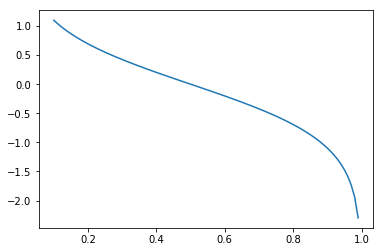

In [20]:
a=0.5*np.log((1-e)/(e))
pl.plot(e,a)
pl.show()

### AdaBoost误差分析

**定理1 $\quad \quad$AdaBoost算法最终分类器的训练误差界为：**   
$$\frac{1}{N}\sum_{i=1}^NI(G(x_i)\neq y_i)\leq\frac{1}{N}\sum_{i=1}^N exp(-y_if(x_i))=\prod_mZ_m$$这里$G(x)$来自式(7)，$f(x)$来自式(6),$Z_m$来自(5).**这一定理说明可以在每一轮选取适当$G_m$使得$Z_m$最小，从而使训练误差下降最快**

证明：   
当$G(x_i)\neq y_i$时$I=1$，$y_if(x_i)<0$,此时$exp(-y_if(x_i))\geq1$,当$G(x_i)\neq y_i$时$I=0$，$y_if(x_i)>0$,此时$exp(-y_if(x_i))\leq1$.$$\frac{1}{N}\sum_{i=1}^NI(G(x_i)\neq y_i)\leq 1$$由此直接推出前一部分.

后一部分：  
根据(4)式我们有$$w_{mi}exp(-\alpha_my_iG_m(x_i))=Z_mw_{m+1,i}（8）$$

推导：$$\frac{1}{N}\sum_i^Nexp(-y_if(x_i))=\frac{1}{N}\sum_i^Nexp(-\sum_{m=1}^M\alpha_my_iG_m(x_i))$$
$$=\frac{1}{N}\sum_i^N\prod_{m=1}^Mexp(-\alpha_my_iG_m(x_i))$$由于$w_{1,i}=\frac{1}{N}$所以有$$=\sum_i^Nw_{1i}\prod_{m=1}^Mexp(-\alpha_my_iG_m(x_i))$$再是使用（8）式则有$$=Z_1\sum_i^Nw_{2i}\prod_{m=2}^Mexp(-\alpha_my_iG_m(x_i))$$ $$=Z_1Z_2\sum_i^Nw_{3i}\prod_{m=3}^Mexp(-\alpha_my_iG_m(x_i))$$
$$=...$$
$$=\prod_{m=1}^MZ_m$$

**定理2** $\quad\quad$  **对于二分类问题的AdaBoost训练误差界有**：

$$\prod_{m=1}^MZ_m=\prod_{m=1}^{M}[2\sqrt {e_m(1-e_m)}]=\prod_{m=1}^{M}\sqrt(1-4\gamma_m^2)\leq exp(-2\sum_{m=1}^M\gamma_m^2)$$

这里$\gamma_m=\frac{1}{2}-e_m$

证明：由(5)式有：$$Z_m=\sum_{i=1}^Nw_{mi}exp(-\alpha_my_iG_m(x_i)) $$ $$=\sum_{G(x_i)=y_i}w_{mi}e^{-\alpha_m}+\sum_{G(x_i)\neq y_i}w_{mi}e^{\alpha_m}$$ $$=(1-e_m)e^{-\alpha_m}+e_me^{\alpha_m}$$ $$=2\sqrt{e_m(1-e_m)}=\sqrt{1-4\gamma_m^2}$$

根据$e^x和\sqrt{1-x}$在x=0处的泰勒展开式推出不等式$\sqrt{(1-4\gamma_m^2)}\leq exp(-2\gamma_m^2)$   
**推论**$\quad\quad$**如果存在$\gamma>0$对所有$\gamma<\gamma_m$则**：$$\frac{1}{N}\sum_{i=1}^NI(G(x_i)\neq y_i)\leq exp(-2M\gamma^2)$$

**这表明此条件（二分类）下AdaBoost的训练误差是以指数速率下降的，这是训练误差上界是指数函数.**

## AdaBoost算法的解释

**AdaBoost算法另一个解释：AdaBoost是模型为加法模型，损失函数为指数函数，学习算法为前向分步算法的二分类学习方法.**

### 前向分步算法

考虑加法模型:$$f(x)=\sum_{m=1}^M\beta_mb(x;\gamma_m)$$

其中，$b(x;\gamma_m)$为基函数，$\gamma_m$为基函数参数，$\beta_m$为基函数系数.显然(6)式：$f(x)=\sum_{m=1}^M\alpha_mG_m(x) $也是一个加法模型

在给定训练数据及损失函数$L(y,f(y))$的条件下，学习加法模型$f(x)$的问题，**成为经验风险极小化即损失函数极小化问题**：$$min_{\beta_m,\gamma_m}\sum_{i=1}^NL(y_i,\sum_{m=1}^M\beta_mb(x;\gamma_m))  （14）$$

##### 前向分布算法求解这个问题思路：因为学习的是加法模型，如果能够从前向后，每一步只学习一个基函数及其系数，逐步逼近优化目标函数式(14)，那么就可以简化优化的复杂度.具体的，每一步只需要优化如下损失函数：$$min_{\beta,\gamma}\sum_{i=1}^NL(y_i,\beta b(x_i,\gamma))  （15）$$

**具体的前向分布算法:**  
输入：训练数据集$T={(x_1,y_1),(x_2,y_2),...,(x_n,y_n)}$；损失函数$L(y,f(x))$;基本函数集${b(x;\gamma)}$;   
输出：加法模型$f(x)$.   
(1)初始化$f_0(x)=0$  
(2)对$m=1,2,...,M$:   
$\quad\quad$a.极小化损失函数$$argmin_{\beta,\gamma}\sum_{i=1}^NL(y_i,f_{m-1}(x_i)+\beta b(x_i;\gamma))  （16）$$ $\quad\quad$得到参数$\beta_m$,$\gamma_m$   
$\quad\quad$b.更新$$f_m(x)=f_{m-1}(x)+\beta_mb(x;\gamma_m)  （17）$$
(3).得到加法模型$$f(x)=f_M(x)=\sum_{m=1}^M\beta_mb(x;\gamma_m) （18）$$

### AdaBoost与前向分步算法

**定理3**$\quad\quad$ **AdaBoost是前向分步算法的特例.AdaBoost模型是基分类器组成的加法模型，损失函数是指数函数**

##### 证明:

由于AdaBoost的最终分类器是$f(x)=\sum_{m=1}^M\alpha_mG_m(x)$,本身就是一个加法模型，因此我们只需要证明其损失函数是指数函数$$L(y,f(x))=exp(-yf(x))$$时，其学习的具体操作等价于AdaBoost算法学习的具体操作.

假设经过$m-1$轮迭代前向分布算法已经得到$f_{m-1}(x)$:$$f_{m-1}(x)=f_{m-2}(x)+\alpha_{m-1}G_{m-1}(x)=\alpha_1G_1(x)+...+\alpha_{m-1}G_{m-1}(x)$$
第m轮迭代可以得到$\alpha_m$，$G_m(x)$和$f_m(x)$:$$f_m(x)=f_{m-1}(x)+\alpha_mG_m(x)$$目标是使前向分步算法得到的$\alpha_m$和$G_m(x)$使$f_m(x)$在训练数据集$T$上的指数损失函数最小，即$$(\alpha_m,G_m(x))=argmin_{\alpha,G}\sum_{i=1}^Nexp(-y_i(f_{m-1}(x_i)+\alpha G(x_i)))  （20）$$

上式可以表示为：$$(\alpha_m,G_m(x))=argmin_{\alpha,G}\sum_{i=1}^N\bar{w}_{mi}exp[-y_i\alpha G(x_i)] （21）$$

其中$\bar{w}_{mi}=exp[-y_if_{m-1}(x_i)]$,因为$\bar{w}_{mi}$既不依赖于$\alpha$也不依赖于$G$,所以与最小化无关.但是$\bar{w}_{mi}$依赖于$f_{m-1}(x)$，随着每一轮迭代而发生变化

**下面证明，使得式（21）式达到最小的$\alpha^*_m$，$G_m^\ast(x) $就是AdaBoost算法所得到的$\alpha_m$和$G_m(x)$，求解（21）式分两步**：

首先，求$G_m^\ast(x)$，对任意$\alpha>0$，使式(21)最小的$G(x)$由下式得到：$$G_m^\ast(x)=argmin_G\sum_{i=1}^N\bar{w}_{mi}I(y_i\neq G(x_i))（22）$$

其中$\bar{w}_{mi}=exp[-y_if_{m-1}(x_i)]$，这里（22）和（21）式实际上是等价的,因为对$\sum_{i=1}^N\bar{w}_{mi}exp[-y_i\alpha G(x_i)]$求最小值，$\alpha>0$,$\bar{w}_{mi}$可看为常量,所以只用每个$y_iG(x_i)$最大，那么也就是尽量让$I(y_i
\neq G(x_i))$的在整个数据集上的数量最小.也就是下面这句话

*此分类器$G_m^\ast(x)$即为AdaBoost算法的基分类器$G_m(x)$,因为他是使得第$m$轮加权训练数据分类误差率最下的基本分类器.$\bar{w}_{mi}$就是数据权值*

然后求解$\alpha_m^\ast$，式(21)可写成如下：$$\sum_{i=1}^N\bar{w}_{mi}exp[-y_i\alpha G(x_i)]$$ $$=\sum_{G_m(x_i)=y_i}\bar{w}_{mi}e^{-\alpha}+\sum_{G_m(x_i)\neq y_i}\bar{w}_{mi}e^{\alpha}$$
$$=(e^\alpha-e^{-\alpha})\sum_{i=1}^N\bar{w}_{mi}I(y_i\neq G(x_i))+e^{-\alpha}\sum_{i=1}^N\bar{w}_{mi}$$

将上式对$\alpha$求导：简化为$$((e^\alpha-e^{-\alpha})h_1+e^{-\alpha}h_2)'$$令$e^\alpha=x$求导并使导数为$0$可以得$x^2=\frac{h_2-h_1}{h_1}$,然后解出$\alpha_m^\ast=\frac{1}{2}log\frac{h_2-h_1}{h_1}$,最后$$\alpha_m^\ast=\frac{1}{2}log\frac{1-e_m}{e_m}$$

其中$e_m=\frac{\sum_{i=1}^N\bar{w}_{mi}I(y_i\neq G(x_i))}{\sum_{i=1}^N\bar{w}_{mi}}=\sum_{i=1}^Nw_{mi}I(y_i\neq G_m(x_i))$表示分类误差率，*这与AdaBoot的$\alpha_m$完全一样*

*在看样本权值更新是否与AdaBoost一样*

由$f_m(x)=f_{m-1}(x)+\alpha_mG_m(x)$和$\bar{w}_{mi}=exp[-y_if_{m-1}(x_i)]$,那么有$$\bar{w}_{m+1,i}=exp[-y_if_{m}(x_i)]=exp[-y_i(f_{m-1}(x)+\alpha_mG_m(x))]=exp[-y_if_{m-1}(x)]exp[-y_i\alpha_mG_m(x)]$$ $$\bar{w}_{m+1,i}=\bar{w}_{m,i}exp[-y_i\alpha_mG_m(x)]$$

这也与AdaBoost算法权值更新只差了规范化因子，所以等价.   
至此证毕

### AdaBoost算法的正则化

为了防止AdaBoost过拟合，通常会加入正则化项，通常是加入一个步长$v$，即$$f_m(x)=f_{m-1}(x)+v\alpha_mG_m(x)$$ $v$的取值范围$(0,1)$，较小的$v$意味需要更多弱学习器的迭代次数，通常用步长和最大迭代次数一起决定算法拟合效果

### （二）提升树(Boosting Tree)

提升树模型被认为是统计学习中性能最好的方法之一.

#### 提升树模型   
以决策树(回归树)为基分类器的提升方法称为提升树(Boosting Tree).决策树或回归树都是二叉树.提升树模型可以表示为决策树的加法模型：$$f_M(x)=\sum_{m=1}^MT(x;\Theta_m)$$其中$T(x;\Theta_m)$表示决策树;$\Theta$表示决策树参数；M为决策树个数

#### 提升树算法

第$m$步模型是:$$f_m(x)=f_{m-1}(x)+T(x;\Theta_m)$$

经验风险极小化:$$\hat{\Theta}_m=argmin_{\Theta_m}\sum_{i=1}^NL(y_i,f_{m-1}(x_i)+T(x;\Theta_m))$$

<font color=#FF0000>提升回归树使用平方误差作为损失函数，提升分类树使用指数损失函数($L(y,f(x))=exp(-yf(x))$,P145),以及一般损失函数的一般问题</font>

对于二分类问题，提升树算法只需要将AdaBoost算法中基本分类器限制为二分类决策树就可以.<font color=#FF0000>虽然损失函数是指数函数，事实上是不用直接计算这个损失函数的</font>

##### 提升回归树

已知训练数据$T={(x_1,y_1),(x_2,y_2),...,(x_N,y_N)}$.

回归问题提升树使用以前向分布算法：$$f_0(x)=0$$ $$f_m(x)=f_{m-1}(x)+T(x;\Theta_m),m=1,2,...,M$$  $$f_M(x)=\sum_{m=1}^MT(x;\Theta_m)$$

在前向分布算法第m步，给定当前模型$f_{m-1}(x)$需求解：$$\hat{\Theta}_m=argmin_{\Theta_m}\sum_{i=1}^NL(y_i,f_{m-1}(x_i)+T(x;\Theta_m))$$

其中采用平方误差损失函数时，$$L(y,f(x))=(y-f(y))^2$$

即$$L(y,f_{m-1}(x)+T(x;\Theta_m))$$  $$=[y-f_{m-1}(x)-T(x;\Theta_m)]^2$$ $$=[(r-T(x;\Theta))]^2$$

这里， $$r=y-f_{m-1}(x)$$

表示<font color=#FF0000>当前模型拟合数据的残差,所以对于回归算法来说，只需要简单拟合当前模型的残差</font>.

#### 提升回归树算法

输入:训练数据集$T={(x_1,y_1),(x_2,y_2),...,(x_N,y_N)}$  
输出:提升树$f_M(x)$  
(1)初始化$f_0(x)=0$   
(2)对$m=1,2,...,M$：   
$\quad\quad$a.计算残差$$r_{mi}=y_i-f_{m-1}(x_i),i=1,2,...,N$$
$\quad\quad$b.拟合残差$r_{mi}$学习一个回归树，得到$T(x;\Theta_m)$   
$\quad\quad$c.更新$f_m(x)=f_{m-1}(x)+T(x;\Theta_m)$   
(3)得到提升回归树$$f_M(x)=\sum_{m=1}^MT(x;\Theta_m)$$

### （三） 梯度提升(gradient boosting decision tree)

<font color=#FF0000>当损失函数是平方损失和指数函数损失函数，每一步优化很简单，但对于一般的损失函数而言往往不易</frpnt>这就引入了梯度提升，利用最速下降法的近似方法，**关键是使用损失函数的负梯度在当前模型的值**

#### 梯度提升树算法（GBDT）-回归算法

输入：训练数据集$T={(x_1,y_1),(x_2,y_2),...,(x_N,y_N)}$;损失函数$L(y,f(x))$;   
输出：回归树$\hat{f}(x)$  
(1)初始化$$f_0(x)=argmin_c\sum_{i=1}^NL(y_i,c)$$

(2)对$m=1,2,...,M$:  
$\quad\quad$a.对$i=1,2,...,N$计算$$r_{mi}=-[\frac{\partial L(y_i,f(x_i)) }{\partial f(x_i) }]_{f(x)=f_{m-1}(x)}$$  
$\quad\quad$b.对新数据集$(x_i,r_{mi})$拟合一个CART回归树，注意里标签值是$r_{mi}$，得到第$m$棵树的叶节点区域$R_{mj},j=1,2,..,J$   
$\quad\quad$c.对$j=1,2,...,J$,计算$$c_{mj}=argmin_c \sum_{x_i\in R_{mj}}L(y_i,f_{m-1}(x_i)+c)（CART回归树中是各个区域标签均值）$$  
$\quad\quad$得到回归树$$T_{m}=\sum_{m=1}^Jc_{mj}I(x\in R_{mj})$$
$\quad\quad$d.更新$f_m(x)=f_{m-1}(x)+\sum_{j=1}^Jc_{mj}I(x\in R_{mj})$   
(3)得到回归树$$\hat{f}(x)=f_M(x)=\sum_{m=1}^M\sum_{j=1}^Jc_{mj}I(x\in R_{mj})$$   
注意:   
1.算法第一步初始化，估计使损失函数极小化的常数值，它是只有根节点的树      
2.第2(a)步中计算损失函数的负梯度在当前模型的值，将它作为残差估计，对于平方损失函数，它就是通常所说的残差，对于一般损失函数，它就是残差近似值   
3.第2(b)步估计回归树叶节点区域，以拟合残差近似值   
4.第2(c)步利用线性搜索估计叶节点区域的值，使损失函数极小化

###### 例子

In [53]:
import pandas as pd
import numpy as np
data0={"x":[1,2,3,4,5,6,7,8,9,10],
     "y":[5.56,5.70,5.91,6.40,6.80,7.05,8.90,8.70,9.00,9.05]}#来自统计学习方法
data0=pd.DataFrame(data0)
data0

,x,y
0,1,5.56
1,2,5.70
2,3,5.91
3,4,6.40
4,5,6.80
5,6,7.05
6,7,8.90
7,8,8.70
8,9,9.00
9,10,9.05


现在我们来计算其GBRT模型,选取的最小化整体损失函数是$$\sum_{i=1}^N(y_i-f(x_i))^2$$,其单个样本损失函数为$$(y_i-f(x_i))^2$$梯度为$$-[\frac{\partial L(y_i,f(x_i))}{\partial f(x_i)}]=2(y_i-f(x_i))$$这里直接使用$y_i-f(x_i)$

第一步先求$f_0(x)$即回归树$T_0(x)$，也就是求$f(x)=argmin_{c_0} \sum_{i=0}^9(y_i-c_0)^2$,对此式求导可得$c_0=\frac{\sum_{i=0}^Ny_i}{N}$

In [29]:
data_y=data0["y"]
data_L0=[]
c_0=np.sum(data0["y"])/len(data0)
print(c_0)
data_L0.append(np.sum((data_y-c_0)**2))
print(data_L0)

7.307
[19.114210000000003]


根据上面计算当我们选取$f_0(x)=7.05$，损失函数有最小值

第二步根据第2a步求出残差表

In [30]:
f_0=7.307
data1={"x":[1,2,3,4,5,6,7,8,9,10],
     "r":list(data0["y"]-f_0)}
data1=pd.DataFrame(data1)
data1

,x,r
0,1,-1.747
1,2,-1.607
2,3,-1.397
3,4,-0.907
4,5,-0.507
5,6,-0.257
6,7,1.593
7,8,1.393
8,9,1.693
9,10,1.743


第三步对残差进行拟合回归树(见CART回归树的建立):   
首先计算搜索最优切分特征和最优切分点，由于特征就一个所以就是$x$，现在搜索最优切分点

In [37]:
data_L1=[]
C11=[]
C12=[]
# S=[(data1["x"][i]+data1["x"][i+1])/2 for i in  range(len(data1["x"])-1)]#备选切分点,这里用的是x间隔均值
# print(S)
# for s in S:
#     sum=0
#     c1=[]
#     c2=[]
#     for x,r in zip(data1["x"],data1["r"]):
#         if x<=s:
#             c1.append(r)
#         else:
#             c2.append(r)
#     c1=np.mean(c1)
#     c2=np.mean(c2)
#     for x,r in zip(data1["x"],data1["r"]):
#         if x<=s:
#             sum+=(r-c1)**2
#         else:
#             sum+=(r-c2)**2
#     data_L1.append(sum)

##直接选取x作为备选切分点
for s in data1["x"]:
    sum=0
    c11=[]
    c12=[]
    for x,r in zip(data1["x"],data1["r"]):
        if x<=s:
            c11.append(r)
        else:
            c12.append(r)
    c11=np.mean(c1)
    c12=np.mean(c2)
    C11.append(c1)
    C12.append(c2)
    for x,r in zip(data1["x"],data1["r"]):
        if x<=s:
            sum+=(r-c11)**2
        else:
            sum+=(r-c12)**2
    data_L1.append(sum)
print(data_L1)
print("c11:",C11[5])
print("c12:",C12[5])

[15.723088888888887, 12.0833875, 8.365638095238095, 5.775475000000003, 3.9113200000000017, 1.9300083333333335, 8.009809523809526, 11.735399999999997, 15.738599999999998, 19.11421]
c1: -1.0703333333333338
c2: 1.6054999999999997


可以得知最优切分点是$x=6$,个各区域输出值为$c_{11}=-1.0703,c_{12}=1.6055$,所以我们可以得到回归树$f_1(x_i)=7.307+\sum_{k=1}^2c_{1k}I(x_i\in R_{1k})$

第一轮迭代已经完成

进行第二轮迭代，首先还是计算新的需要拟合的数据

In [40]:
def F1(x):
    if x<=6:
        return 7.307-1.0703
    else:
        return 7.307+1.6055

求新残差表

In [42]:
data2={"x":[1,2,3,4,5,6,7,8,9,10],
     "r":[data0["y"][i]-F1(data0["x"][i]) for i in range(10)]}
data2=pd.DataFrame(data2)
data2

,x,r
0,1,-0.6767
1,2,-0.5367
2,3,-0.3267
3,4,0.1633
4,5,0.5633
5,6,0.8133
6,7,-0.0125
7,8,-0.2125
8,9,0.0875
9,10,0.1375


第三步对残差进行拟合回归树(见CART回归树的建立):
首先计算搜索最优切分特征和最优切分点，由于特征就一个所以就是𝑥，现在搜索最优切分点

In [51]:
data_L2=[]
C21=[]
C22=[]
for s in data2["x"]:
    sum=0
    c21=[]
    c22=[]
    for x,r in zip(data2["x"],data2["r"]):
        if x<=s:
            c21.append(r)
        else:
            c22.append(r)
    c21=np.mean(c21)
    c22=np.mean(c22)
    C21.append(c21)
    C22.append(c22)
    for x,r in zip(data2["x"],data2["r"]):
        if x<=s:
            sum+=(r-c21)**2
        else:
            sum+=(r-c22)**2
    data_L2.append(sum)
print(data_L2)
print("c21:",C21[2])
print("c22:",C22[2])

[1.421235199999999, 1.0098567799999985, 0.8006163352380933, 1.1402758533333317, 1.665360511999999, 1.930008333333334, 1.9299332152380952, 1.89835646, 1.9089952799999999, 1.9300083360000004]
c21: -0.5133666666666675
c22: 0.2199857142857142


可以得知最优切分点是$x=3$,个各区域输出值为$c_{21}=-0.5134,c_{22}=0.22$,所以我们可以得到回归树$f_2(x_i)=7.307+\sum_{k=1}^2c_{1k}I(x_i\in R_1k)+\sum_{k=1}^2c_{2k}I(x_i\in R_{2k})$

进行第三轮迭代，首先还是计算新的需要拟合的数据

In [46]:
def F2(x):
    f1=F1(x)
    if x<=3:
        return f1-0.5134
    else:
        return f1+0.22
    

求新残差表

In [47]:
data3={"x":[1,2,3,4,5,6,7,8,9,10],
     "r":[data0["y"][i]-F2(data0["x"][i]) for i in range(10)]}
data3=pd.DataFrame(data3)
data3

,x,r
0,1,-0.1633
1,2,-0.0233
2,3,0.1867
3,4,-0.0567
4,5,0.3433
5,6,0.5933
6,7,-0.2325
7,8,-0.4325
8,9,-0.1325
9,10,-0.0825


第三步对残差进行拟合回归树(见CART回归树的建立):
首先计算搜索最优切分特征和最优切分点，由于特征就一个所以就是𝑥，现在搜索最优切分点

In [52]:
data_L3=[]
C31=[]
C32=[]
for s in data3["x"]:
    sum=0
    c31=[]
    c32=[]
    for x,r in zip(data3["x"],data3["r"]):
        if x<=s:
            c31.append(r)
        else:
            c32.append(r)
    c31=np.mean(c31)
    c32=np.mean(c32)
    C31.append(c31)
    C32.append(c32)
    for x,r in zip(data3["x"],data3["r"]):
        if x<=s:
            sum+=(r-c31)**2
        else:
            sum+=(r-c32)**2
    data_L3.append(sum)
print(data_L3)
print("c31:",C31[5])
print("c32:",C32[5])

[0.7709864622222217, 0.7788541149999993, 0.8006163352380948, 0.7992815233333329, 0.767737584, 0.47794967333333394, 0.6009705066666668, 0.771725715, 0.7930538399999999, 0.8006163399999996]
c31: 0.14666666666666592
c32: -0.2200000000000002


可以得知最优切分点是$x=6$,个各区域输出值为$c_{31}=0.1467,c_{32}=-0.22$,所以我们可以得到回归树$f_3(x_i)=7.307+\sum_{k=1}^2c_{1k}I(x_i\in R_1k)+\sum_{k=1}^2c_{2k}I(x_i\in R_{2k})+\sum_{k=1}^2c_{3k}I(x_i\in R_{3k})$

这样继续迭代下去直至满足停止条件

#### 梯度提升树算法-分类
GBDT的分类算法从思想上和GBDT的回归算法没有区别，但是由于样本标签不是连续的值，而是离散的类别，导致我们无法直接从输出类别去拟合类别输出的误差。为了解决这个问题，主要有两个方法，一个是用指数损失函数，此时GBDT退化为Adaboost算法。另一种方法是用类似于逻辑回归的对数似然损失函数的方法。也就是说，我们用的是类别的预测概率值和真实概率值的差来拟合损失。本文仅讨论用对数似然损失函数的GBDT分类。而对于对数似然损失函数，我们又有二元分类和多元分类的区别。
#### 梯度提升树算法（GBDT）-二分类

对于二元分类GBDT,这里使用类似于逻辑回归的对数似然损失函数，则单样本损失函数为：$$L(y,f(x))=-logP(Y=y|x)=log(1+exp(-yf(x)))$$

*这个损失函数这么来的：*   
对于$x_i$,其标签是$y_i$,那么我们当然希望模型判断$x_i$为$y_i$的概率$P(Y=y_i|x_i)$越大越好，也就是希望$-P(Y=y_i|x_i)$越小越好。在二分类中$y\in \{-1,+1\}$，$$P(Y=y|x)=\frac{exp(yf(x))}{1+exp(yf(x))}$$所以有：
$$P(Y=1|x)=\frac{exp(f(x))}{1+exp(f(x))}$$，$$P(Y=-1|x)=1-P(Y=1|x)=\frac{exp(-f(x))}{1+exp(-f(x))}=\frac{1}{1+exp(f(x))}$$.

所以可以得到$$L(y,f(x))=-logP(Y=y|x)=-log(\frac{exp(yf(x))}{1+exp(yf(x))})=log(\frac{1+exp(yf(x))}{exp(yf(x))})=log(1+exp(-yf(x)))$$

则此时的负梯度误差为$$r_{mi}=-[\frac{\partial L(y,f(x_i))}{\partial f(x_i)}]_{f(x)=f_{m-1}(x)}=\frac{y_i}{1+exp(y_if(x_i))}$$

对于生成的决策树，各个叶子节点的最佳负梯度拟合值为$$c_{mk}=argmin_c\sum_{x_i\in R_{mk}}log(1+exp(-y_i(f_{t-1}(x_i)+c)))$$

上式难解，一般使用近似值代替$$c_{mk}=\frac{\sum_{x_i\in R_{mk}}r_{mi}}{\sum_{x_i\in R_{mi}}}|r_{mk}|(1-|r_{mk}|)$$

也就是除了负梯度计算和叶子结点的最佳负梯度拟合，二元GBDT分类同GBDT回归算法过程相同

#### 注意

在上面推导中若$y\in \{1,0\}$，则单样本损失函数可以写成逻辑回归的对数似然函数$$L(y,f(x))=ylog(P(Y=1|x))+(1-y)log(1-P(Y=1|x))$$

其中$$P(Y=1|x)=\frac{exp(f(x))}{1+exp(f(x))}$$，$$P(Y=0|x)=1-P(Y=1|x)=\frac{1}{1+exp(f(x))}$$.就不能写为$P(Y=y|x)=\frac{exp(yf(x))}{1+exp(yf(x))}$的合体形式

#### 梯度提升树算法（GBDT）-多分类

注意：   
1.对于多分类任务，GDBT的做法是采用一对多的策略,即，对每个类别训练$M$个分类器。假设有$K$个类别，那么训练完之后总共有$M\times K$颗树。   
2.$K$个类别都拟合完第一颗树之后才开始拟合第二颗树，不允许先把某一个类别的M颗树学习完，再学习另外一个类别

对于多元分类，我们假设有$K$类，则此时的单样本对数似然损失函数函数$$L(y,f(x))=-\sum_{k=1}^Ky_klog(P(Y=k|x))$$

整体的就是$$L(y,f(x))=-\sum_{i=1}^Ny_ilog(P(Y=y_i|x_i))$$

其中如若模型对样本$x$输出类别为$y_k$则$y_k=1$,否则$y_k=0$，也就是实际上只算了其标签类别对应的预测值得损失函数$$P(Y=k|x)=\frac{exp(f_k(x))}{\sum_{l=1}^Kexp(f_l(x))}$$

也就是实际上模型输出的是一个K维向量，表示样例属于各个类别的相对可能性，然后通过上式进行归一化处理.

此时，在第$m$轮迭代，第$i$个样本对应类别$l$的负梯度误差是$$r_{mil}=-[\frac{\partial L(y,f(x_i))}{\partial f(x_i)}]_{f(x)=f_{m-1}l(x)}=y_{il}-P(Y=l|x)$$

对于各个类别生成的决策树，各个叶子节点的最佳负梯度拟合值为$$c_{mlk}=argmin_{c}\sum_{x_i\in R_mlk}L(l,f_{m-1,l}(x)+c)$$$c_{mlk}$就表示$l$类别的第$m$轮迭代的决策树的第$k$个分区的拟合值.

由于上式难优化，所以用近似值代替$$c_{mlk}=\frac{K-1}{K}\frac{\sum_{x_i\in R_{mlk}}r_{mlk}}       {\sum_{x_i\in R_{mlk}}|r_{mlk}|(1-|r_{mlk}|)}$$这里K表示类别数

那么就可以得到$l$类别第$m$轮迭代的决策树$$T_{ml}=\sum_{i=1}^Nc_{mlk}I(x_i\in R_{mlk})$$

那么当所有类别的第$m$轮迭代分类器都生成了之后再继续下一轮迭代